## Final Project Submission

Please fill out:
* Student name: Jake Sherman
* Student pace: Flex
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL:


# Introduction

# Business Case

Residential brokerage is a very competitive industry and in order to get a leg up on the competition, Sherman Realtors Inc. will offer homeowners/clients complimentary consulting on how they can maximize the value of their home before putting it on the market.  They have hired me to analyze Kings Country housing market data to determine how best to advise their clients' home renovations.

# Objective

We will create a linerar regression model to analyze housing price changes based on the changes on independent variables based on King's County real estate data.  We will make two recomendations to clients on how they can add most value to their home. Recomendations will be based on linear regression because it allows us to quantify how unit changes in independent variables will affect our dependent variable, price.

# Methodology

1. Clean data and make sure no Nan values and dropping unused columns.

2. Convert all data to relevant numeric feature.

3. Check for r-sqared, linearity, homoscedasticity, normality and appropriate p_values for all coefficients.

4. Iterate to improve overall model scoring by using some combination of feature engineering, data scaling, and          categorizing variables.

5. Interpret the final model and discuss results.

### Means of Analysis

R-squared: This score represents how much of the variance in the data can be explained by the regression model.  We want this number to be as close to 1 as possible.  Any variance not explained by the model is explained by error.  R-squared represents a goodness of fit test.

Homoscedasticity: This is represented visually and we want the values of the residuals to be less cone shaped and more flat. AKA we want the variance of the data to be evenly distributed across the values of the independent variable.

Normality: We want the residuals to be normally distributed.  This data will be represented by QQ plots.

Linearity:  We want to see a linear relationship between the independent and dependent variables.  Failing to put together a linear model will result in a poor regression model.

P-values:  P- values for our independent variables should be below .05 in order to us to reject the null hypothesis.

RMSE: Root mean squared error measures the differences between the values the model estimates and the values observed.  We want this number to be as small as possible.  In this case it represents the dollar value of expected error for each variable.  We used this instead of MAE because it is more sensitive to outliers.

### Import Libraries

We are importing the tools necessary to perform our analysis and giving them aliases so we can call on them later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import scipy.stats as stats


### Import Data

Using pandas to read the Kings County Housing data set as a dataframe.

In [2]:
#reading the dataset and viewing the head of the data
df= pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Some of the data columns have been cut from view.  Lets view them all.

In [3]:
#showing all the columns of the dataset
pd.set_option('display.max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

# Data Cleaning

Now that we have a clearer understanding of what the data means, we need to drop the noise and clean it.  There are a number of catagories here that may not be helpful to homeowners, ie. things that they cannot control.  

1. View: while a nice view certainly helps home value, this is subjective may be noise in our model.

2. Sqft_living15 and sqft_lot15: Its always best to have the smallest/cheapest house in the neighborhood, but this information less impactful in determining what renovations need to be made for incumbants.

3. Lat/Long and Zip Code: We are going to take a broad look at King's County.

4. Yr_renovated and yr_built:  These will likely have a strong correlation with condition and grade which are the more important variables.  These can be dropped for redundancy. 

In [4]:
#dropping uneeded columns
df= df.drop(['id','view', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'zipcode', 'yr_renovated', 'yr_built'], axis=1)

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0


Now that we have the columns we will be working with, we need to check data types and get a sense of null values so we can make adjustments. Starting by getting the shape ie. how many rows of data we have and then calling info to check non-null values and data type.

In [6]:
#checking shape of dataframe
df.shape

(21597, 12)

In [7]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


There are a few columns that are objects that we will need to make integers so we can quantify their values.  Also, there seems to be quite a few missing values for waterfront will will have to be addressed as well.

The real estate market is time sensitive so the first thing we need to do is concentrate our analysis to the newer listing as older ones will be inaccurate when measured against the current market place.  We are going to drop all listings older than 10 years, or everything pre-dating 2012.

In [8]:
#changing the date to indicate only the year
df['date']= df['date'].map(lambda x: x[-4:])
#changing the date from object to int
df['date']=df['date'].astype(int)

Now that we have converted the date to integers and taken only the year from each row, lets see how far back the data goes.

In [9]:
#sorting values by date
df.sort_values(by='date')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
0,2014,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0
12988,2014,725000.0,3,1.50,1790,6000,1.5,NO,Good,7 Average,1790,0.0
12989,2014,1140000.0,4,2.50,3370,10602,2.0,NO,Average,10 Very Good,3370,0.0
12990,2014,680000.0,3,2.25,2920,6300,1.0,NO,Average,8 Good,1710,1210.0
12991,2014,490000.0,2,1.00,2180,9300,1.0,NO,Good,7 Average,1090,1090.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14235,2015,230000.0,3,1.00,1000,4000,1.5,NO,Good,6 Low Average,1000,0.0
14238,2015,196000.0,3,1.00,1090,7400,1.0,NO,Good,7 Average,1090,0.0
14240,2015,615000.0,4,2.50,3010,6903,2.0,NO,Average,9 Better,3010,0.0
14231,2015,275000.0,3,1.75,1290,9760,1.0,NO,Average,7 Average,1290,0.0


Great! All of the data is recent enough to be relevant in today's market so we won't have to drop any values.  Lets look at waterfront value counts to see how we should replace NAN values.  

In [10]:
#waterfront value counts
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

Given than the overwhelming ratio of 'NO' to 'YES' for waterfront view, we can safely assume NaN values are 'No'.  Let's make the change. Afterwards we will change NO to 0 and YES to 1

In [11]:
#chaning NaN values to "NO"
df['waterfront']= df['waterfront'].fillna('NO')

In [12]:
#changing YES to equal value 1 and NO to equal value 0
df.waterfront = df.waterfront.map(dict(YES=1, NO=0))
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
0,2014,221900.0,3,1.00,1180,5650,1.0,0,Average,7 Average,1180,0.0
1,2014,538000.0,3,2.25,2570,7242,2.0,0,Average,7 Average,2170,400.0
2,2015,180000.0,2,1.00,770,10000,1.0,0,Average,6 Low Average,770,0.0
3,2014,604000.0,4,3.00,1960,5000,1.0,0,Very Good,7 Average,1050,910.0
4,2015,510000.0,3,2.00,1680,8080,1.0,0,Average,8 Good,1680,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014,360000.0,3,2.50,1530,1131,3.0,0,Average,8 Good,1530,0.0
21593,2015,400000.0,4,2.50,2310,5813,2.0,0,Average,8 Good,2310,0.0
21594,2014,402101.0,2,0.75,1020,1350,2.0,0,Average,7 Average,1020,0.0
21595,2015,400000.0,3,2.50,1600,2388,2.0,0,Average,8 Good,1600,0.0


The square footage of the basement is an object.  Lets look further into why.

In [13]:
#viewing value counts of the basement square footage
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
588.0         1
518.0         1
666.0         1
2360.0        1
2500.0        1
Name: sqft_basement, Length: 304, dtype: int64

There are 454 '?' values.  Let's change these to 0 and convert to int.

In [14]:
#changing ? values to 0 and converting to int
df['sqft_basement'] = (df['sqft_basement'].map(lambda x: 0.0 if x == '?' else x)).astype(float)

Let's check if there are any other null values.

In [15]:
#checking for null values
df.isin(['#', 'NaN', '?', 'null']).any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
condition        False
grade            False
sqft_above       False
sqft_basement    False
dtype: bool

Now lets convert condition and grade into integers. Condition and Grade descriptions each have a corresponding value.

Condition:

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

Grade:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [16]:
#replace words with associated numeric code
df['condition']= df['condition'].str.replace('Poor', '1').replace('Fair', '2').replace('Average', '3').replace('Good', '4').replace('Very Good', '5')

In [17]:
#convert data type from object to string
df['condition']= df['condition'].astype('int')

In [18]:
#drop the wording behind grade and convert type to int
df['grade']= df['grade'].map(lambda x: x[:1]).astype(int)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
0,2014,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0.0
1,2014,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400.0
2,2015,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0.0
3,2014,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910.0
4,2015,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0.0


In [19]:
#checking all values have numeric datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  int32  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   condition      21597 non-null  int32  
 9   grade          21597 non-null  int32  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
dtypes: float64(4), int32(3), int64(5)
memory usage: 1.7 MB


In [20]:
#average price of home
df['price'].mean()

540296.5735055795

Text(0.5, 1.0, 'Heatmap of Correlation Between Attributes')

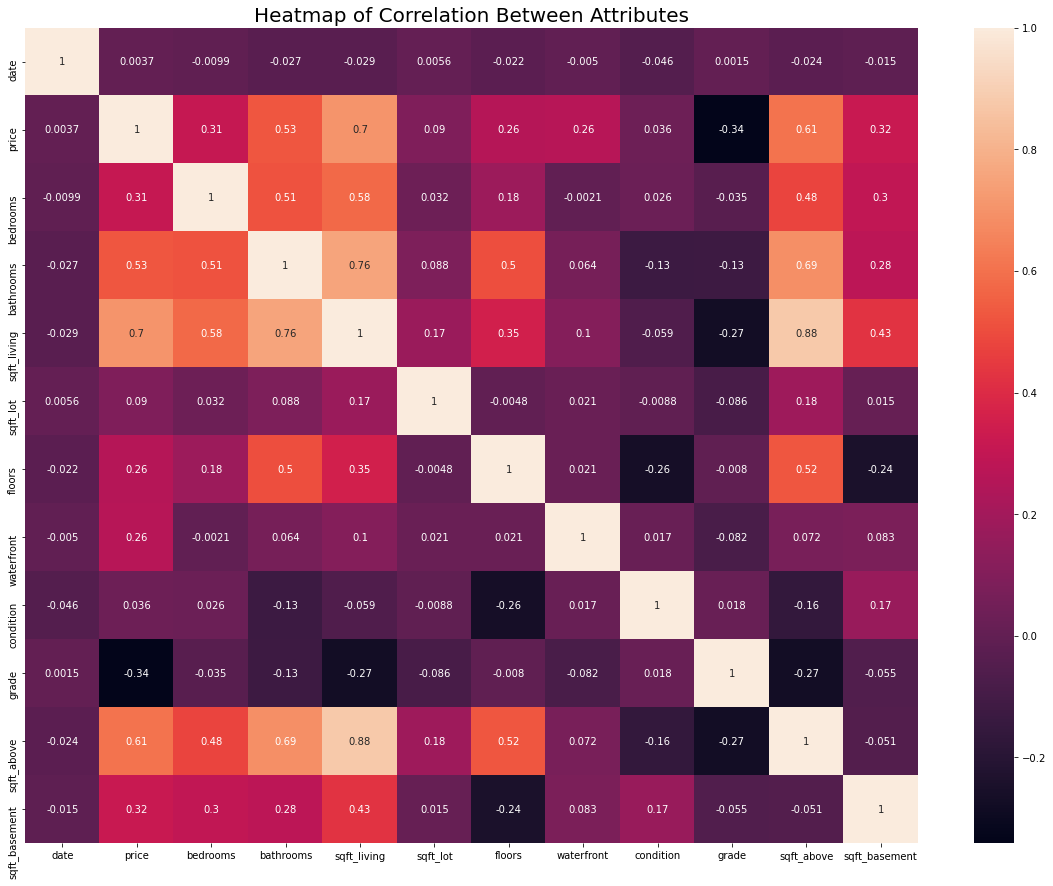

In [21]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
ax.set_title("Heatmap of Correlation Between Attributes", fontsize=20)

### Baseline Model

In [22]:
# create predictors
predictors = df.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(df['price'],predictors_int).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     2599.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:40:37   Log-Likelihood:            -2.9828e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21585   BIC:                         5.967e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.748e+07   7.08e+06     -6.707      0.000   -6.14e+07   -3.36e+07
date           2.361e+04   3514.386      6.717      0.000    1.67e+04    3.05e+04
bedrooms      -4.731e+04   2246.541    -21.058      0.000   -5.17e+04   -4.29e+04
bathrooms      1.557e+04   3618.897      4.304      0.000    8480.624    2.27e+04
sqft_living     244.9618     21.530     11.378      0.000     202.761     287.163
sqft_lot         -0.3602      0.041     -8.843      0.000      -0.440      -0.280
floors         3.758e+04   4123.840      9.112      0.000    2.95e+04    4.57e+04
waterfront     7.869e+05   2.02e+04     38.884      0.000    7.47e+05    8.27e+05
condition      5.187e+04   2646.959     19.596      0.000    4.67e+04    5.71e+04
grade         -2.825e+04    920.754    -30.686      0.000   -3.01e+04   -2.64e+04
sqft_above       21.2562     21.531      0.987      0.324     -20.946      63.458
sqft_basement    53.3135     21.437      2.487      0.013      11.296      95.331
==============================================================================
Omnibus:                    12932.261   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           417616.686
Skew:                           2.339   Prob(JB):                         0.00
Kurtosis:                      24.028   Cond. No.                     1.90e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sqft_living has the highest correlation with price.  Lets use this independent variable to make our determinations.

#### Linearity Check

C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


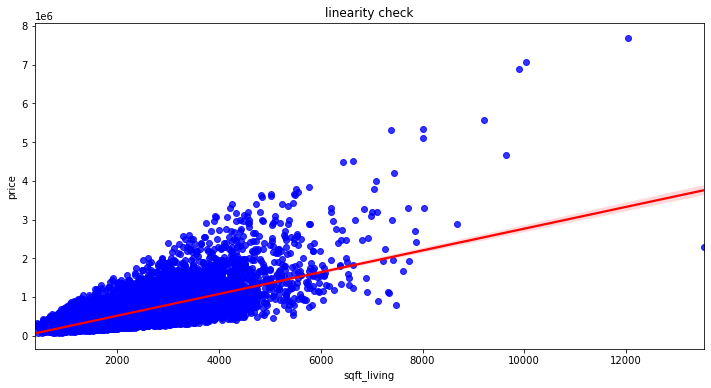

In [108]:
#visualizing normality of square footage and home price
plt.figure(figsize=(12,6))
plt.title('linearity check')
sns.regplot(df.sqft_living, df.price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

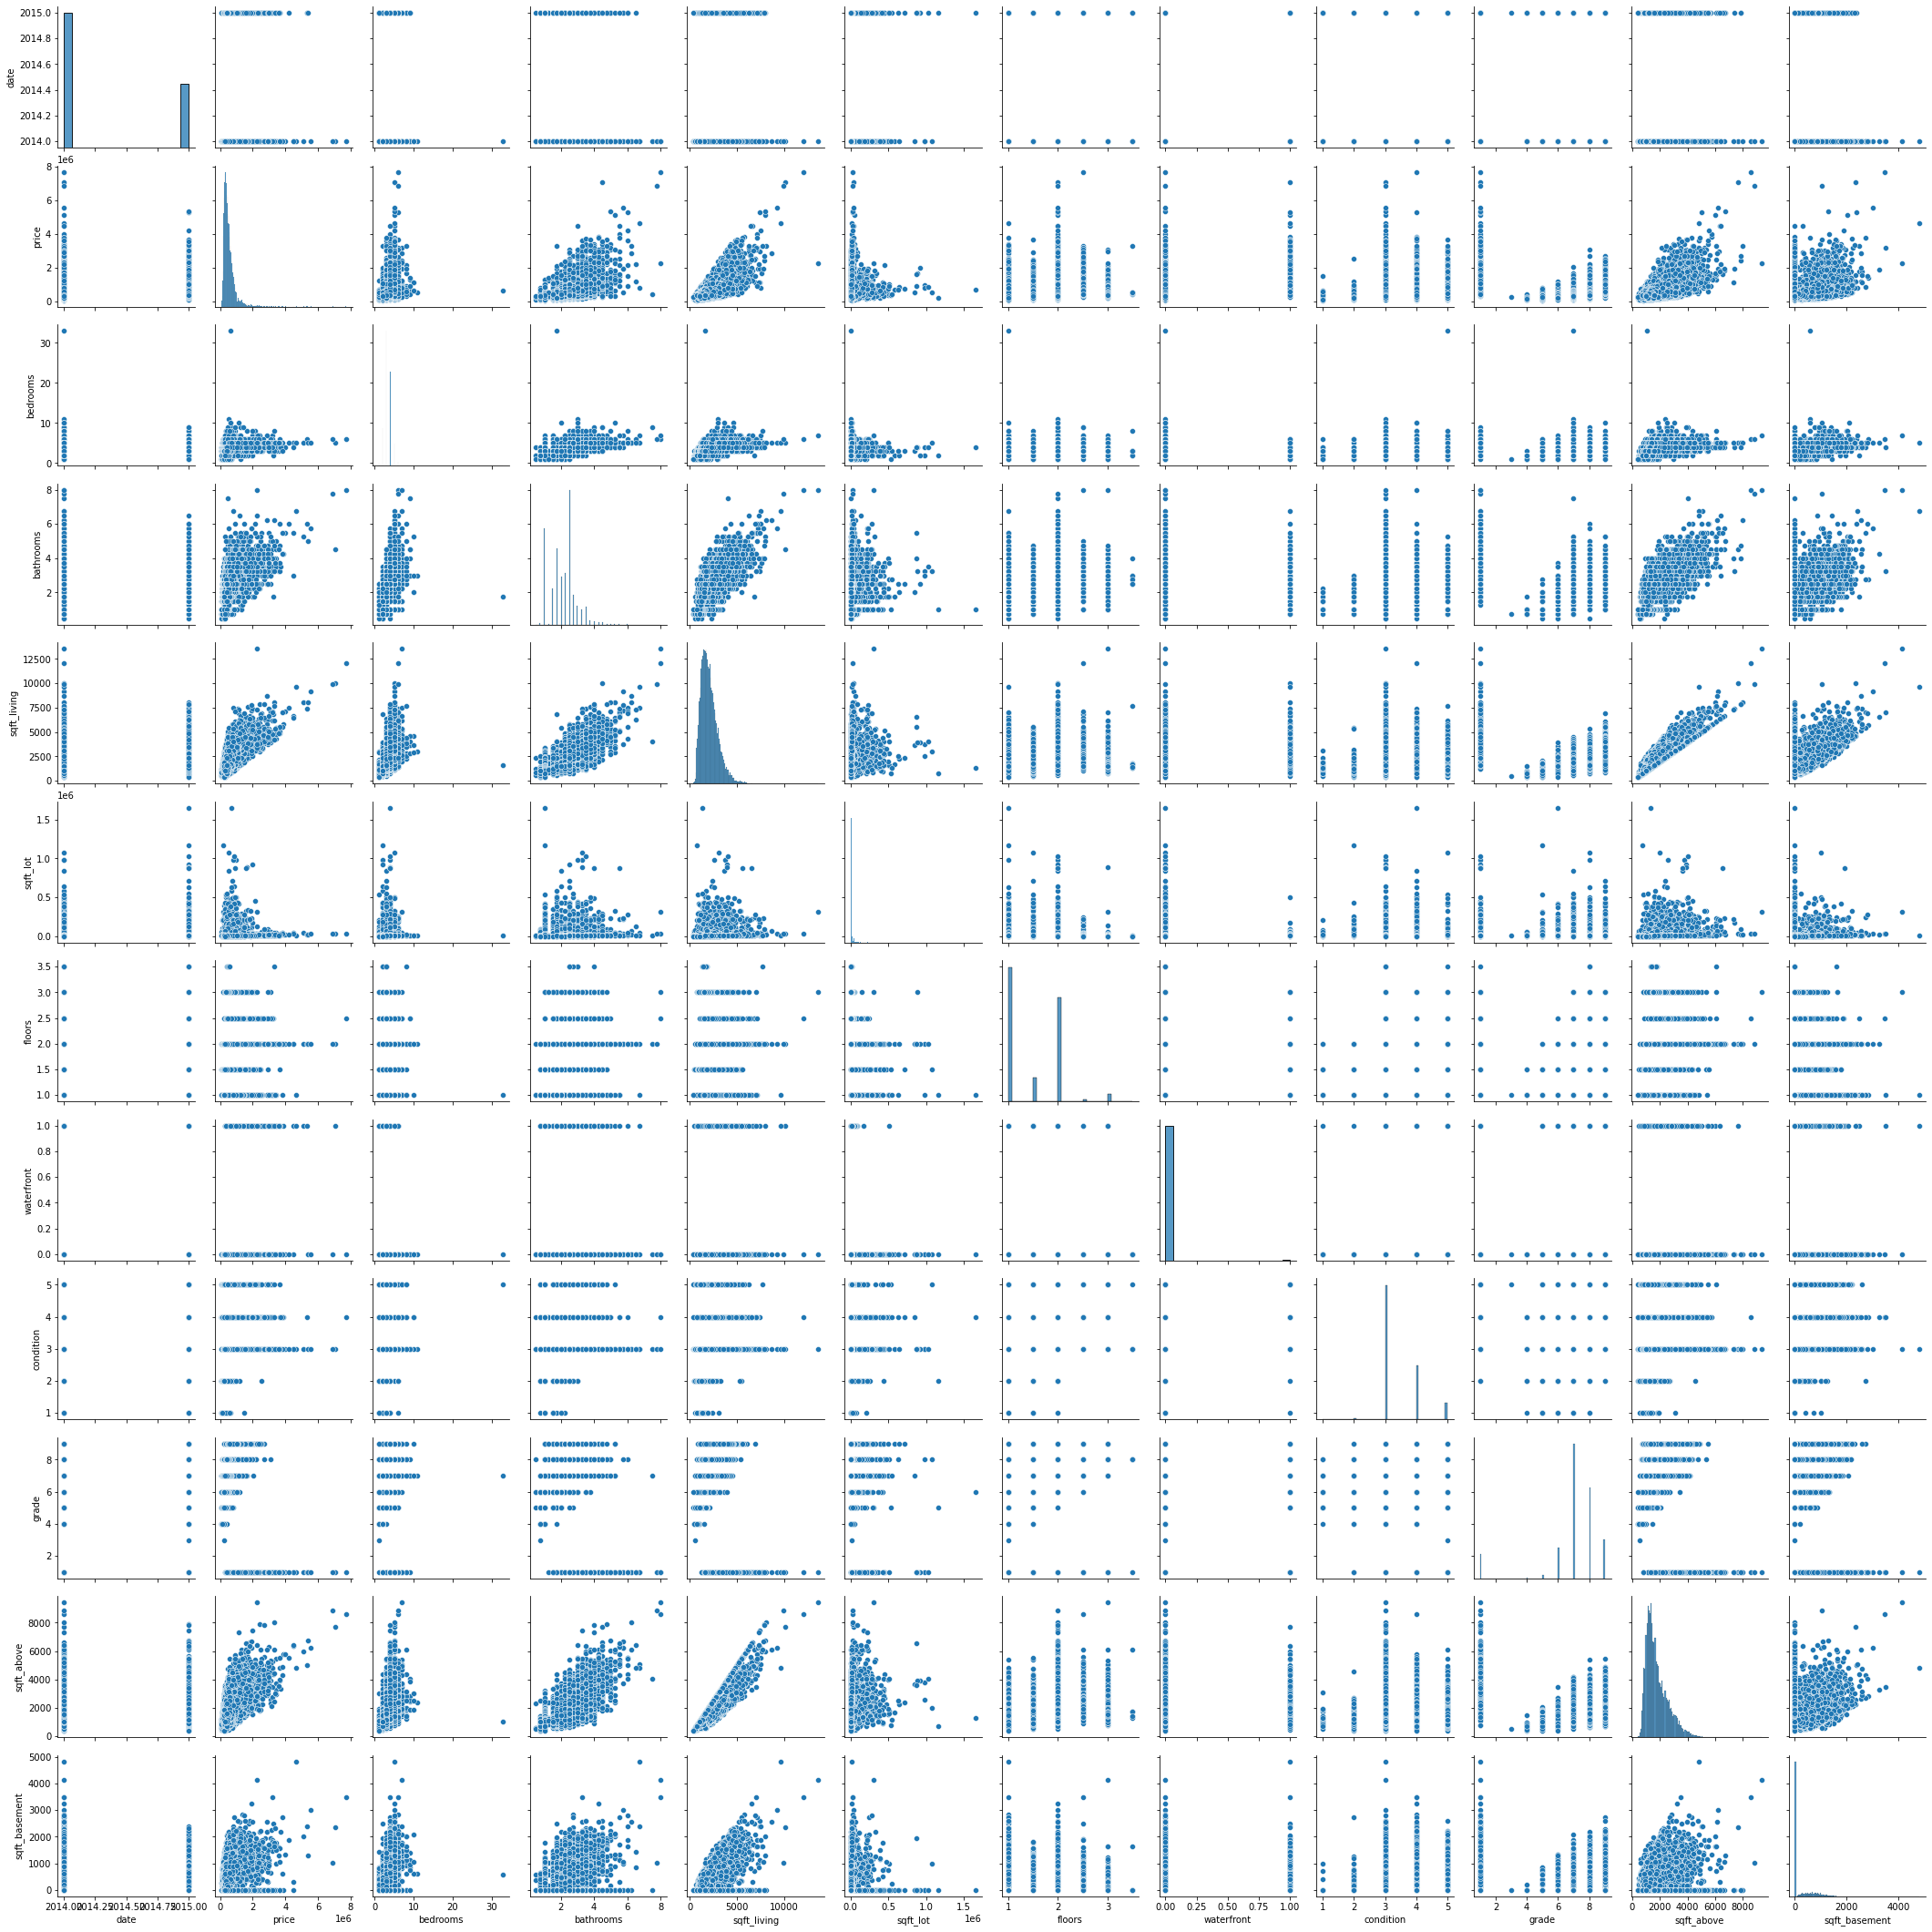

In [24]:
#view scatter plots and distributions for variables
sns.pairplot(df)

#### Homoscedasticity

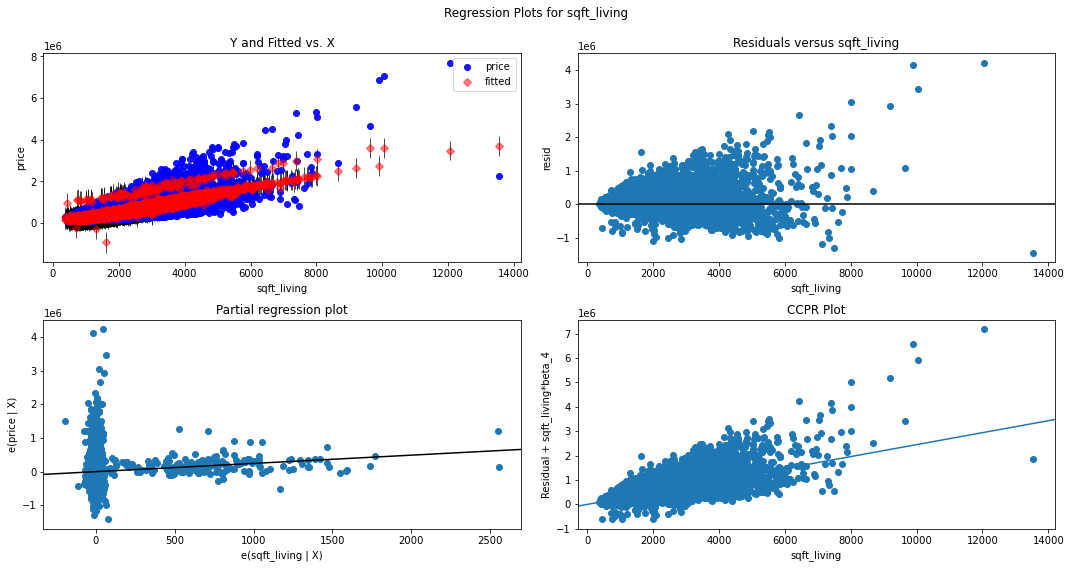

In [25]:
#visualizing homoscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

#### Normality

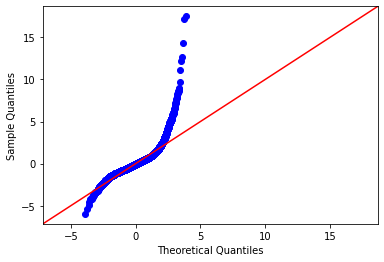

In [26]:
#checking for normality with QQ plot

residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


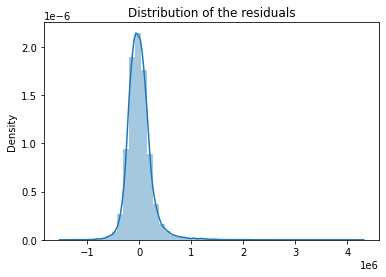

In [27]:
#checking for normality
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of the residuals')

In [28]:
# return Root Mean Squared Error
rmse_residuals = np.sqrt(model.mse_resid)

# view Root Mean Squared Error
rmse_residuals

241009.1524241141

#### Baseline Summary

An R-Sqared score of 57 is not ideal, the model is not that well fit. most p-values are reasonable except sqft_above which is way to high to be able to reject the null hypothesis. Linearity is somewhat evident.  Residual data is somewhat coneshaped therefore heteroscedasticic which will need to be enhanced. QQ plot fails normality check especially at higher values, residual distribution is too narrow.  The RMSE is $241,009. Now we are going to do some feature engeineering to see if we can improve all facets of the model.

### Model Improvement 1: Checking for and Removing Outliers

In [29]:
#checking data shape before we drop outliers
df.shape

(21597, 12)

In [30]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

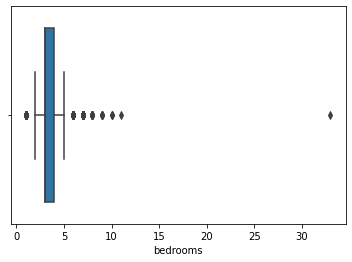

In [31]:
# Checking for bedroom outliers.
sns.boxplot(x=df['bedrooms']);

The majority of data falls under 7 bedrooms. 33 must be a mistake.  Lets drop all bedroom values above 7.

In [32]:
#dropping rows with more than 7 bedrooms
df1=df[df['bedrooms']<7]

In [33]:
#making sure changes took place
df1['bedrooms'].value_counts()

3    9824
4    6882
2    2760
5    1601
6     272
1     196
Name: bedrooms, dtype: int64

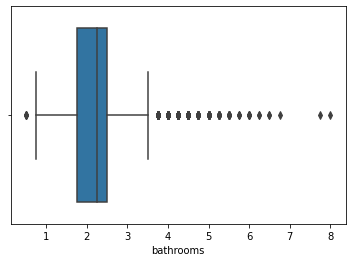

In [34]:
#checking for bathroom outliers
sns.boxplot(x=df1['bathrooms']);


In [35]:
#removing bathroom outliers
df1= df1[df1['bathrooms']<4]

In [36]:
#checking bathroom distribution
df1['bathrooms'].describe()

count    21158.000000
mean         2.069891
std          0.698252
min          0.500000
25%          1.500000
50%          2.250000
75%          2.500000
max          3.750000
Name: bathrooms, dtype: float64

In [37]:
#counting bathroom values
df1['bathrooms'].value_counts()

2.50    5374
1.00    3850
1.75    3047
2.25    2044
2.00    1929
1.50    1443
2.75    1179
3.00     744
3.50     725
3.25     587
3.75     152
0.75      71
1.25       9
0.50       4
Name: bathrooms, dtype: int64

<AxesSubplot:xlabel='sqft_living'>

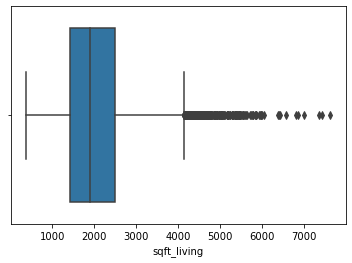

In [38]:
#checking for outliers in sqft_living
sns.boxplot(x=df1['sqft_living'])

In [39]:
df1['sqft_living'].describe()

count    21158.000000
mean      2029.706352
std        830.370037
min        370.000000
25%       1410.000000
50%       1890.000000
75%       2500.000000
max       7620.000000
Name: sqft_living, dtype: float64

There is a wide range of values here.  The 75th percentile is 2500 square feet and there are plenty of outliers above 4100 sqft.

In [40]:
df1.shape

(21158, 12)

In [41]:
#dropping outlier large sqft_living
df1= df1[df1['sqft_living']< 4100]

In [42]:
#checking how many rows were lost
df1.shape

(20730, 12)

<AxesSubplot:xlabel='price'>

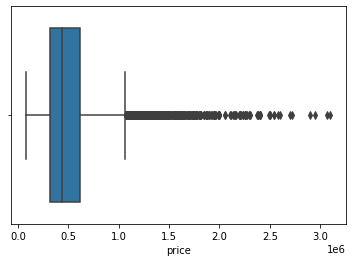

In [43]:
#checking for price outliers
sns.boxplot(x=df1['price'])

In [44]:
#checking changes took place
df1['price'].describe()

count    2.073000e+04
mean     5.029130e+05
std      2.729029e+05
min      7.800000e+04
25%      3.170000e+05
50%      4.400000e+05
75%      6.160000e+05
max      3.100000e+06
Name: price, dtype: float64

In [45]:
#dropping prices above $1.1m
df1= df1[df1['price']< 1100000]

In [46]:
df1.shape

(20003, 12)

<AxesSubplot:xlabel='sqft_lot'>

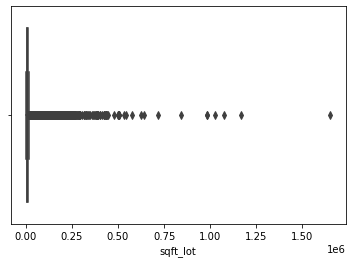

In [47]:
#checking sqft_lot outliers
sns.boxplot(x=df1['sqft_lot'])

The outliers are strong here, lets inspect.

In [48]:
#breakdown of lot size
df1['sqft_lot'].describe()

count    2.000300e+04
mean     1.417051e+04
std      3.891286e+04
min      5.200000e+02
25%      5.000000e+03
50%      7.491000e+03
75%      1.020600e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [49]:
#lot sizes in descending order
df1['sqft_lot'].sort_values(ascending=False)

1717     1651359
17305    1164794
7640     1074218
7762     1024068
3945      982998
          ...   
21536        638
20588        635
7582         600
5821         572
15729        520
Name: sqft_lot, Length: 20003, dtype: int64

There are some huge plots of land here which is skewing the data. An acre is 43,560 feet.  I will drop all values above 5 acres or 217,800 feet.

In [50]:
#dropping lot size values above 5 acres
df1= df1[df1['sqft_lot']<217800]

In [51]:
#checking new sqft_lot breakdown
df1['sqft_lot'].describe()

count     19852.000000
mean      11694.114800
std       19938.560513
min         520.000000
25%        5000.000000
50%        7455.000000
75%       10125.000000
max      217697.000000
Name: sqft_lot, dtype: float64

In [52]:
#checking how many values were lost
df1.shape

(19852, 12)

<AxesSubplot:xlabel='sqft_basement'>

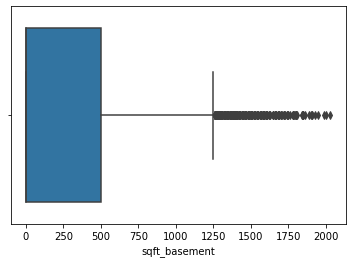

In [53]:
#checking sqft_basement outliers
sns.boxplot(x=df1['sqft_basement'])

In [54]:
df1=df1[df1['sqft_basement']<1250]

In [55]:
df1['sqft_basement'].describe()

count    19352.000000
mean       222.068985
std        346.706188
min          0.000000
25%          0.000000
50%          0.000000
75%        440.000000
max       1248.000000
Name: sqft_basement, dtype: float64

In [56]:
#checking to see how much of out dataset is intact after dropping outliers
df1.shape

(19352, 12)

Close to 90% of total data is still in play after dropping outliers.  Lets update the baseline model.

In [57]:
# create predictors
predictors = df1.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model1 = sm.OLS(df1['price'],predictors_int).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     1109.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:13   Log-Likelihood:            -2.5879e+05
No. Observations:               19352   AIC:                         5.176e+05
Df Residuals:                   19340   BIC:                         5.177e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.816e+07   4.82e+06     -5.844      0.000   -3.76e+07   -1.87e+07
date             1.4e+04   2392.267      5.853      0.000    9312.364    1.87e+04
bedrooms      -3.112e+04   1706.402    -18.236      0.000   -3.45e+04   -2.78e+04
bathrooms     -6138.5971   2636.892     -2.328      0.020   -1.13e+04    -970.061
sqft_living     198.1450     16.310     12.149      0.000     166.176     230.114
sqft_lot         -0.2389      0.059     -4.061      0.000      -0.354      -0.124
floors         4.546e+04   2875.012     15.813      0.000    3.98e+04    5.11e+04
waterfront     1.812e+05   2.38e+04      7.625      0.000    1.35e+05    2.28e+05
condition      3.462e+04   1822.383     18.998      0.000     3.1e+04    3.82e+04
grade          -446.2522    786.826     -0.567      0.571   -1988.500    1095.995
sqft_above      -13.9470     16.241     -0.859      0.390     -45.781      17.887
sqft_basement    18.8284     16.253      1.158      0.247     -13.029      50.686
==============================================================================
Omnibus:                      904.352   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1038.836
Skew:                           0.546   Prob(JB):                    2.63e-226
Kurtosis:                       3.312   Cond. No.                     9.92e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Linearity for Model 1

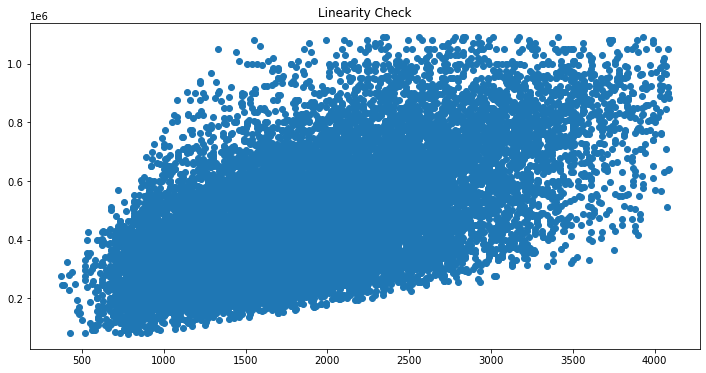

In [58]:
#visualizing normality of square footage and home price
plt.figure(figsize=(12,6))
plt.scatter(df1.sqft_living, df1.price)
plt.title('Linearity Check')
plt.show()

#### Homoscedasticicty for Model 1

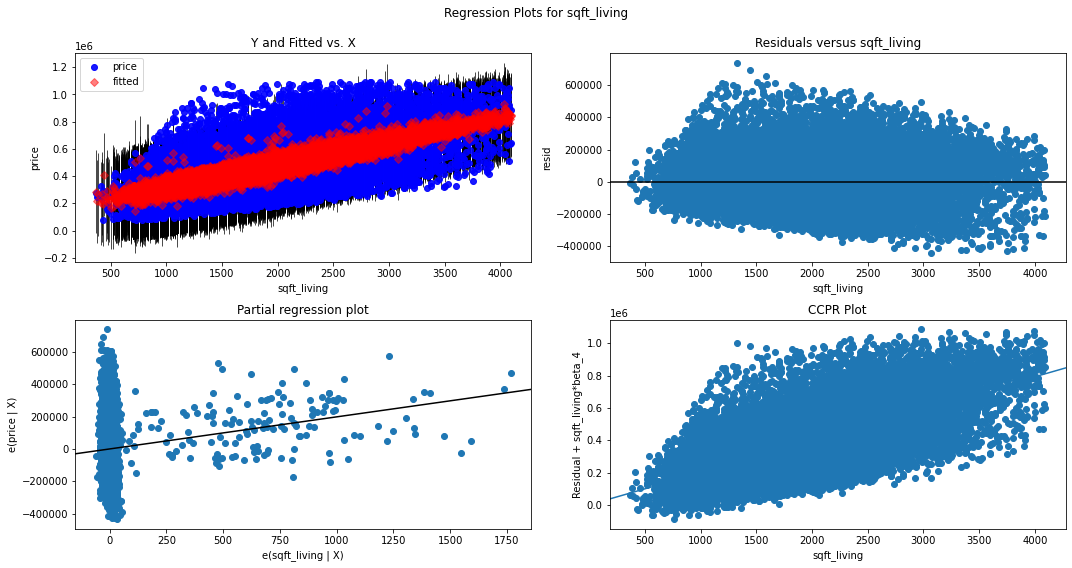

In [59]:
#visualizing homoscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "sqft_living", fig=fig)
plt.show()

#### Normality for Model 1

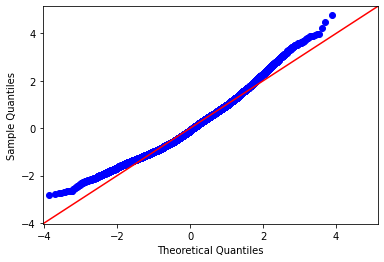

In [60]:
#checking for normality with QQ plot

residuals = model1.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

#### RMSE

In [61]:
# return Root Mean Squared Error
rmse_residuals1 = np.sqrt(model1.mse_resid)

# view Root Mean Squared Error
rmse_residuals1

155442.77218813304

After dropping outliers we had some good changes and one major bad change.  R-squared score dropped from 57 to 39 which makes this model fairly unfit. While linearity is slight there does seem to be some evidence.  However, we dramatically improved normality and the residuals also look more homoscedastic which are prerequisites for a reliable model.  We are still seeing unreliable p-values.  Lets try creating catagorical variables and dropping sqft_above to see if we can improve. 

### Model Improvement 2: Adding catagorical variables and dropping sqft_above (Dummy Model)

In [62]:
#creating a list of catagorical features
encode_cols= ['floors', 'waterfront', 'grade', 'condition', 'bedrooms', 'bathrooms']
#dataframe with dummy columns
dfd= pd.get_dummies(data=df1, columns=encode_cols, drop_first=True)

In [63]:
dfd= dfd.drop(['sqft_above'], axis=1)

In [64]:
dfd.head()

,date,price,sqft_living,sqft_lot,sqft_basement,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,condition_2,condition_3,condition_4,condition_5,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75
0,2014,221900.0,1180,5650,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2014,538000.0,2570,7242,400.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2015,180000.0,770,10000,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2014,604000.0,1960,5000,910.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2015,510000.0,1680,8080,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [65]:
# create predictors
predictors = dfd.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model2 = sm.OLS(dfd['price'],predictors_int).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     490.9
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:15   Log-Likelihood:            -2.5686e+05
No. Observations:               19352   AIC:                         5.138e+05
Df Residuals:                   19312   BIC:                         5.141e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.363e+07   4.37e+06     -7.699      0.000   -4.22e+07   -2.51e+07
date            1.692e+04   2168.096      7.804      0.000    1.27e+04    2.12e+04
sqft_living       99.5498      2.990     33.293      0.000      93.689     105.411
sqft_lot          -0.2567      0.054     -4.793      0.000      -0.362      -0.152
sqft_basement     53.1066      3.729     14.243      0.000      45.798      60.415
floors_1.5      8.993e+04   3754.784     23.950      0.000    8.26e+04    9.73e+04
floors_2.0      9327.3288   3416.321      2.730      0.006    2631.044     1.6e+04
floors_2.5      6.647e+04   1.43e+04      4.661      0.000    3.85e+04    9.44e+04
floors_3.0      6.101e+04   6777.159      9.003      0.000    4.77e+04    7.43e+04
floors_3.5      7.162e+04   5.76e+04      1.243      0.214   -4.14e+04    1.85e+05
waterfront_1    1.932e+05   2.16e+04      8.930      0.000    1.51e+05    2.36e+05
grade_3        -4.357e+05   1.42e+05     -3.060      0.002   -7.15e+05   -1.57e+05
grade_4        -4.216e+05   2.97e+04    -14.215      0.000    -4.8e+05   -3.63e+05
grade_5        -4.207e+05    1.2e+04    -35.067      0.000   -4.44e+05   -3.97e+05
grade_6        -3.782e+05   7924.213    -47.722      0.000   -3.94e+05   -3.63e+05
grade_7        -3.011e+05   6875.988    -43.795      0.000   -3.15e+05   -2.88e+05
grade_8        -2.057e+05   6426.845    -32.013      0.000   -2.18e+05   -1.93e+05
grade_9        -9.122e+04   6380.173    -14.298      0.000   -1.04e+05   -7.87e+04
condition_2    -2.273e+04   2.89e+04     -0.787      0.432   -7.94e+04    3.39e+04
condition_3     2178.0411   2.69e+04      0.081      0.935   -5.05e+04    5.48e+04
condition_4     3.327e+04   2.69e+04      1.237      0.216   -1.94e+04     8.6e+04
condition_5     8.193e+04   2.71e+04      3.025      0.002    2.88e+04    1.35e+05
bedrooms_2     -2892.6767   1.09e+04     -0.265      0.791   -2.43e+04    1.85e+04
bedrooms_3       -5.2e+04   1.09e+04     -4.763      0.000   -7.34e+04   -3.06e+04
bedrooms_4     -6.072e+04   1.12e+04     -5.422      0.000   -8.27e+04   -3.88e+04
bedrooms_5     -7.247e+04    1.2e+04     -6.027      0.000    -9.6e+04   -4.89e+04
bedrooms_6     -4.796e+04   1.63e+04     -2.944      0.003   -7.99e+04    -1.6e+04
bathrooms_0.75  1.016e+05   7.26e+04      1.399      0.162   -4.07e+04    2.44e+05
bathrooms_1.0   1.018e+05   7.05e+04      1.443      0.149   -3.64e+04     2.4e+05
bathrooms_1.25  4.332e+04   8.83e+04      0.491      0.624    -1.3e+05    2.16e+05
bathrooms_1.5   8.124e+04   7.06e+04      1.151      0.250   -5.71e+04     2.2e+05
bathrooms_1.75  9.036e+04   7.06e+04      1.281      0.200   -4.79e+04    2.29e+05
bathrooms_2.0   8.904e+04   7.06e+04      1.262      0.207   -4.93e+04    2.27e+05
bathrooms_2.25  6.909e+04   7.06e+04      0.979      0.328   -6.93e+04    2.07e+05
bathrooms_2.

#### Dummy Model Linearity

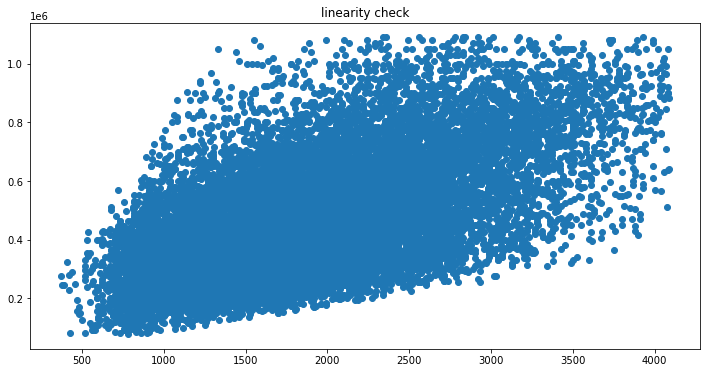

In [66]:
#visualizing normality of square footage and home price
plt.figure(figsize=(12,6))
plt.scatter(df1.sqft_living, df1.price)
plt.title('linearity check')
plt.show()

#### Dummy Model Homoscedasticity

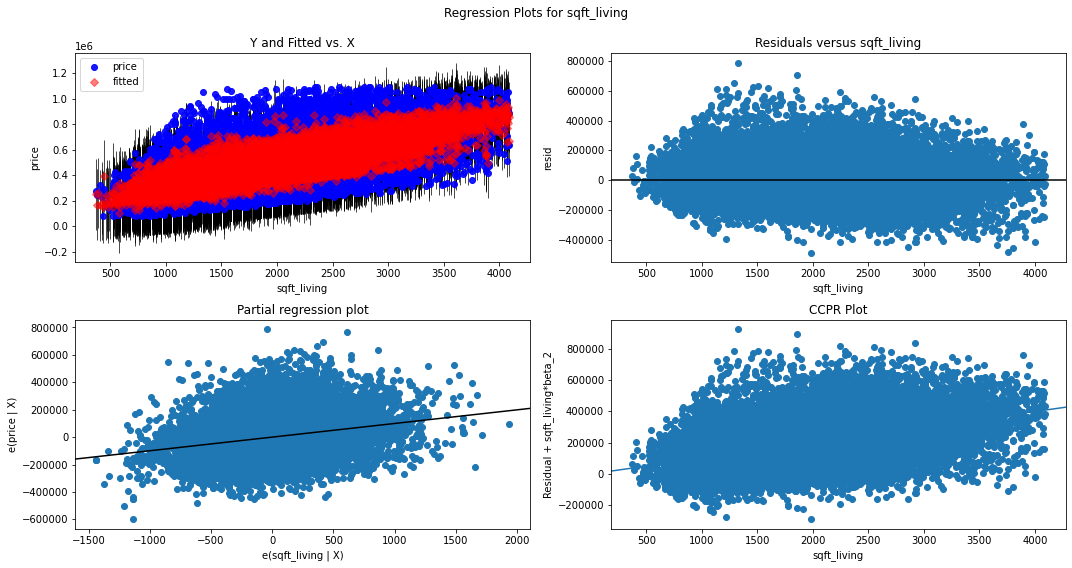

In [67]:
#visualizing homoscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "sqft_living", fig=fig)
plt.show()

#### Dummy Model Normality

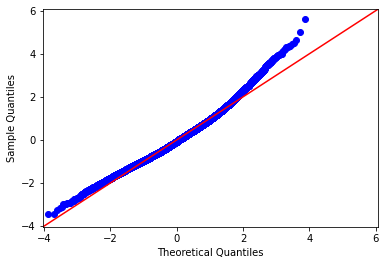

In [68]:
#checking for normality with QQ plot

residuals = model2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

#### RMSE

In [69]:
# return Root Mean Squared Error
rmse_residuals2 = np.sqrt(model2.mse_resid)

# view Root Mean Squared Error
rmse_residuals2

140771.24624606367

The RMSE and R-scores jumped here relative to our last model but there are a number of catagorical variables that have unacceptable p-values far exceeding .05 making much of the data about bathrooms and condition unusable.  Lets try feature scaling an earlier model then will will finish by adjusting how we catagorize certain variables.

### Model Improvement 3: Feature Scaling

In [70]:
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
0,2014,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0.0
1,2014,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400.0
2,2015,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0.0
3,2014,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910.0
4,2015,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0.0


In [71]:
#dropping sqft_above because its p value has been too high in every model
df3= df1.drop(['sqft_above'], axis=1)
df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement
0,2014,221900.0,3,1.00,1180,5650,1.0,0,3,7,0.0
1,2014,538000.0,3,2.25,2570,7242,2.0,0,3,7,400.0
2,2015,180000.0,2,1.00,770,10000,1.0,0,3,6,0.0
3,2014,604000.0,4,3.00,1960,5000,1.0,0,5,7,910.0
4,2015,510000.0,3,2.00,1680,8080,1.0,0,3,8,0.0


<AxesSubplot:>

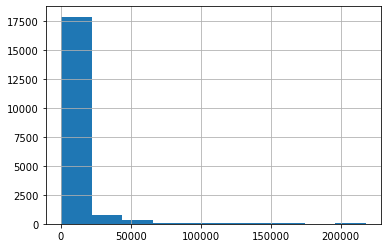

In [72]:
# Log transformation of sqft_lot.
df3['log_sqft_lot'] = np.log(df3['sqft_lot'])
df3['sqft_lot'].hist()

In [73]:
df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,log_sqft_lot
0,2014,221900.0,3,1.00,1180,5650,1.0,0,3,7,0.0,8.639411
1,2014,538000.0,3,2.25,2570,7242,2.0,0,3,7,400.0,8.887653
2,2015,180000.0,2,1.00,770,10000,1.0,0,3,6,0.0,9.210340
3,2014,604000.0,4,3.00,1960,5000,1.0,0,5,7,910.0,8.517193
4,2015,510000.0,3,2.00,1680,8080,1.0,0,3,8,0.0,8.997147


<AxesSubplot:>

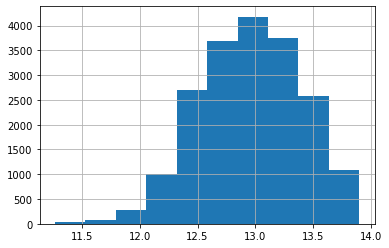

In [74]:
# Log transformation of price.
df3['log_price'] = np.log(df3['price'])
df3['log_price'].hist()

In [75]:
df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,log_sqft_lot,log_price
0,2014,221900.0,3,1.00,1180,5650,1.0,0,3,7,0.0,8.639411,12.309982
1,2014,538000.0,3,2.25,2570,7242,2.0,0,3,7,400.0,8.887653,13.195614
2,2015,180000.0,2,1.00,770,10000,1.0,0,3,6,0.0,9.210340,12.100712
3,2014,604000.0,4,3.00,1960,5000,1.0,0,5,7,910.0,8.517193,13.311329
4,2015,510000.0,3,2.00,1680,8080,1.0,0,3,8,0.0,8.997147,13.142166


<AxesSubplot:>

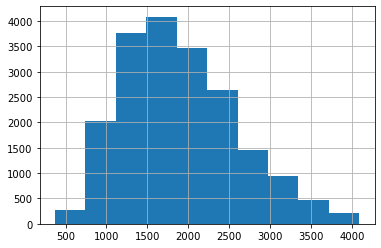

In [76]:
# Log transformation of sqft_living
df3['log_sqft_living'] = np.log(df3['sqft_living'])
df3['sqft_living'].hist()

In [77]:
df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,log_sqft_lot,log_price,log_sqft_living
0,2014,221900.0,3,1.00,1180,5650,1.0,0,3,7,0.0,8.639411,12.309982,7.073270
1,2014,538000.0,3,2.25,2570,7242,2.0,0,3,7,400.0,8.887653,13.195614,7.851661
2,2015,180000.0,2,1.00,770,10000,1.0,0,3,6,0.0,9.210340,12.100712,6.646391
3,2014,604000.0,4,3.00,1960,5000,1.0,0,5,7,910.0,8.517193,13.311329,7.580700
4,2015,510000.0,3,2.00,1680,8080,1.0,0,3,8,0.0,8.997147,13.142166,7.426549


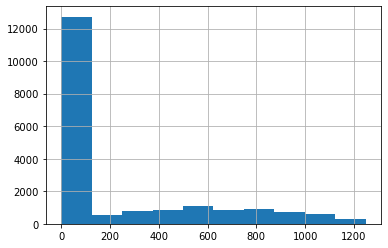

In [78]:
# square root transformation of sqft_lot.
df3['log_sqft_basement'] = np.sqrt(df3['sqft_basement'])
df3['sqft_basement'].hist();

In [79]:
df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,log_sqft_lot,log_price,log_sqft_living,log_sqft_basement
0,2014,221900.0,3,1.00,1180,5650,1.0,0,3,7,0.0,8.639411,12.309982,7.073270,0.000000
1,2014,538000.0,3,2.25,2570,7242,2.0,0,3,7,400.0,8.887653,13.195614,7.851661,20.000000
2,2015,180000.0,2,1.00,770,10000,1.0,0,3,6,0.0,9.210340,12.100712,6.646391,0.000000
3,2014,604000.0,4,3.00,1960,5000,1.0,0,5,7,910.0,8.517193,13.311329,7.580700,30.166206
4,2015,510000.0,3,2.00,1680,8080,1.0,0,3,8,0.0,8.997147,13.142166,7.426549,0.000000


In [80]:
#changing nan values to 0 in sqft_basement
df3['log_sqft_basement']=df3['sqft_basement'].fillna(0)
df3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,log_sqft_lot,log_price,log_sqft_living,log_sqft_basement
0,2014,221900.0,3,1.00,1180,5650,1.0,0,3,7,0.0,8.639411,12.309982,7.073270,0.0
1,2014,538000.0,3,2.25,2570,7242,2.0,0,3,7,400.0,8.887653,13.195614,7.851661,400.0
2,2015,180000.0,2,1.00,770,10000,1.0,0,3,6,0.0,9.210340,12.100712,6.646391,0.0
3,2014,604000.0,4,3.00,1960,5000,1.0,0,5,7,910.0,8.517193,13.311329,7.580700,910.0
4,2015,510000.0,3,2.00,1680,8080,1.0,0,3,8,0.0,8.997147,13.142166,7.426549,0.0


In [81]:
# create predictors
predictors = df3.drop(['price', 'log_price', 'sqft_living', 'sqft_lot', 'sqft_basement'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model3 = sm.OLS(df3['price'],predictors_int).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     1111.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:18   Log-Likelihood:            -2.5913e+05
No. Observations:               19352   AIC:                         5.183e+05
Df Residuals:                   19341   BIC:                         5.184e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.909e+07   4.91e+06     -5.929      0.000   -3.87e+07   -1.95e+07
date               1.346e+04   2434.795      5.529      0.000    8688.685    1.82e+04
bedrooms          -3.145e+04   1766.567    -17.800      0.000   -3.49e+04    -2.8e+04
bathrooms         -5935.9030   2727.776     -2.176      0.030   -1.13e+04    -589.226
floors             2.972e+04   3255.335      9.129      0.000    2.33e+04    3.61e+04
waterfront         2.041e+05   2.42e+04      8.422      0.000    1.57e+05    2.52e+05
condition          3.256e+04   1852.915     17.571      0.000    2.89e+04    3.62e+04
grade             -7116.4124    799.434     -8.902      0.000   -8683.372   -5549.453
log_sqft_lot      -2.303e+04   1729.359    -13.316      0.000   -2.64e+04   -1.96e+04
log_sqft_living    3.542e+05   5668.108     62.493      0.000    3.43e+05    3.65e+05
log_sqft_basement    10.9799      4.143      2.650      0.008       2.859      19.101
==============================================================================
Omnibus:                      755.572   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              846.251
Skew:                           0.510   Prob(JB):                    1.73e-184
Kurtosis:                       3.098   Cond. No.                     8.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

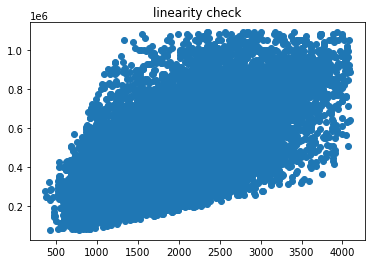

In [82]:
#visualizing normality of square footage and home price
plt.scatter(dfd.sqft_living, df3.price)
plt.title('linearity check')
plt.show()

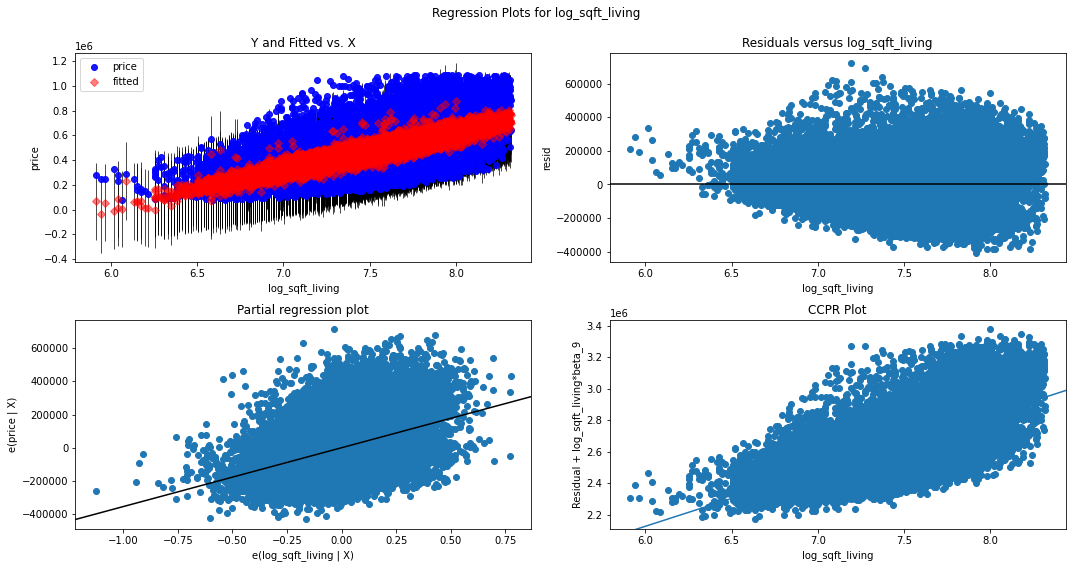

In [83]:
#visualizing homoscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model3, "log_sqft_living", fig=fig)
plt.show()

C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


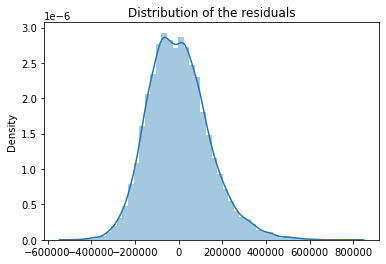

In [84]:
#checking for normality
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of the residuals')

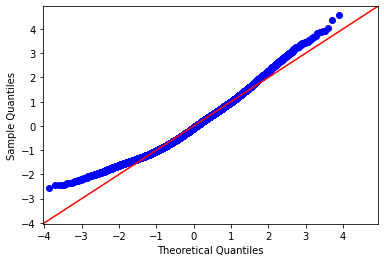

In [85]:
residuals = model3.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [86]:
# return Root Mean Squared Error
rmse_residuals3 = np.sqrt(model3.mse_resid)

# view Root Mean Squared Error
rmse_residuals3

158204.1539728138

Although our p-values are all healthy, our RMSE and R-score have gone backwards.  Lets change course by selecting the only catagorical varialbes that showed strong p-values.

### Final Model: selective catagorical features

In [87]:
#creating a list of catagorical features
encode_cols1= ['waterfront', 'grade']
#dataframe with dummy columns
dfd2= pd.get_dummies(data=df3, columns=encode_cols1, drop_first=True)

In [88]:
dfd2['price'].mean()

463884.4855828855

In [89]:
dfd2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,log_sqft_lot,log_price,log_sqft_living,log_sqft_basement,waterfront_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,2014,221900.0,3,1.00,1180,5650,1.0,3,0.0,8.639411,12.309982,7.073270,0.0,0,0,0,0,0,1,0,0
1,2014,538000.0,3,2.25,2570,7242,2.0,3,400.0,8.887653,13.195614,7.851661,400.0,0,0,0,0,0,1,0,0
2,2015,180000.0,2,1.00,770,10000,1.0,3,0.0,9.210340,12.100712,6.646391,0.0,0,0,0,0,1,0,0,0
3,2014,604000.0,4,3.00,1960,5000,1.0,5,910.0,8.517193,13.311329,7.580700,910.0,0,0,0,0,0,1,0,0
4,2015,510000.0,3,2.00,1680,8080,1.0,3,0.0,8.997147,13.142166,7.426549,0.0,0,0,0,0,0,0,1,0


In [90]:
# create predictors
predictors = dfd2.drop(['price', 'log_price', 'log_sqft_lot', 'log_sqft_basement', 'log_sqft_living',  ], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model4 = sm.OLS(dfd2['price'],predictors_int).fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     1077.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:20   Log-Likelihood:            -2.5735e+05
No. Observations:               19352   AIC:                         5.147e+05
Df Residuals:                   19335   BIC:                         5.149e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.272e+07   4.48e+06     -7.309      0.000   -4.15e+07   -2.39e+07
date           1.646e+04   2222.342      7.407      0.000    1.21e+04    2.08e+04
bedrooms      -1.381e+04   1623.491     -8.507      0.000    -1.7e+04   -1.06e+04
bathrooms     -2.487e+04   2502.659     -9.937      0.000   -2.98e+04      -2e+04
sqft_living      96.2758      2.941     32.740      0.000      90.512     102.040
sqft_lot         -0.2325      0.055     -4.254      0.000      -0.340      -0.125
floors         2.684e+04   2688.039      9.986      0.000    2.16e+04    3.21e+04
condition      4.091e+04   1695.450     24.128      0.000    3.76e+04    4.42e+04
sqft_basement    68.6028      3.657     18.757      0.000      61.434      75.772
waterfront_1   1.989e+05   2.21e+04      9.005      0.000    1.56e+05    2.42e+05
grade_3         -4.3e+05   1.45e+05     -2.973      0.003   -7.13e+05   -1.46e+05
grade_4       -3.981e+05   2.89e+04    -13.776      0.000   -4.55e+05   -3.41e+05
grade_5       -3.971e+05   1.21e+04    -32.943      0.000   -4.21e+05   -3.73e+05
grade_6       -3.625e+05   8040.262    -45.089      0.000   -3.78e+05   -3.47e+05
grade_7       -3.009e+05   6979.159    -43.115      0.000   -3.15e+05   -2.87e+05
grade_8       -2.118e+05   6514.460    -32.519      0.000   -2.25e+05   -1.99e+05
grade_9       -9.857e+04   6505.662    -15.151      0.000   -1.11e+05   -8.58e+04
==============================================================================
Omnibus:                     1071.446   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1331.368
Skew:                           0.557   Prob(JB):                    7.89e-290
Kurtosis:                       3.639   Cond. No.                     9.91e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.91e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Linearity

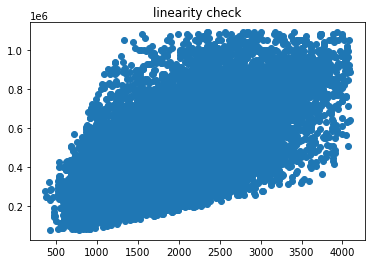

In [91]:
#visualizing normality of square footage and home price
plt.scatter(dfd.sqft_living, dfd2.price)
plt.title('linearity check')
plt.show()

#### Homoscedasticity

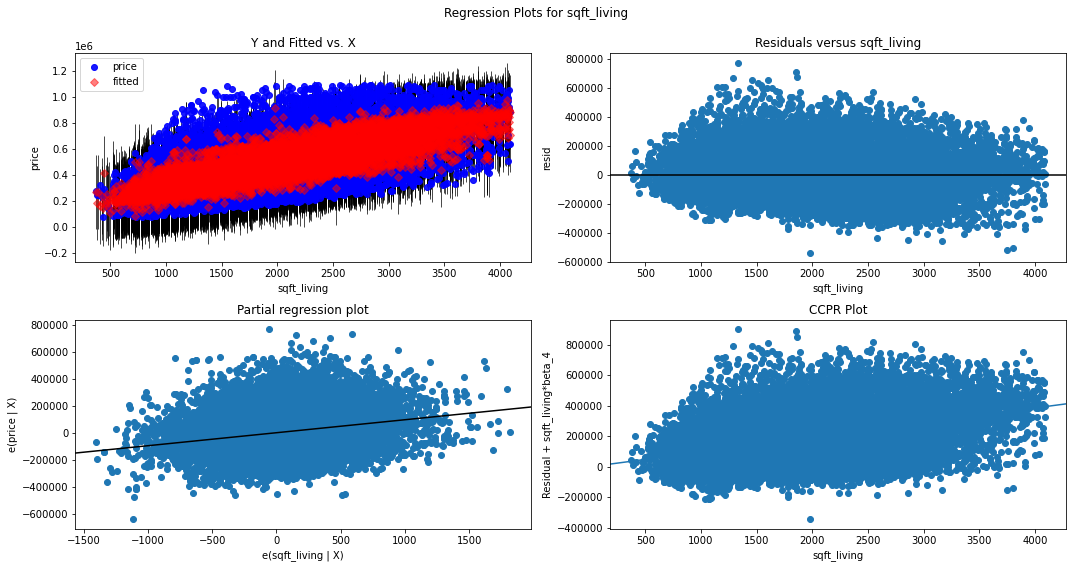

In [92]:
#visualizing homoscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "sqft_living", fig=fig)
plt.show()

#### Normality

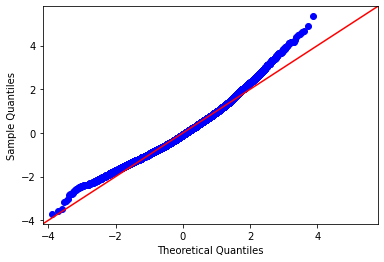

In [93]:
residuals = model4.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

#### RMSE

In [94]:
# return Root Mean Squared Error
rmse_residuals4 = np.sqrt(model4.mse_resid)

# view Root Mean Squared Error
rmse_residuals4

144361.47801957693

## Conclusion

Once again, we used regression analysis to determine how unit changes in various independent variables affected our dependent variable price.  We want to be able to advise clients on how much they can expect expect to make by making changes to their home.  The coefficients in the regression model describe the relationship between the independent variable.


### Breaking Down the Iterations

Baseline: Once we cleaned the data, ie no null values and it was converted to numeric form, we modeled our baseline. While it had the highest r-squared score it lacked normality, it was heteroscedastic (the variance in residuals was uneven), and there were independent variables with unusable p-values (they were too large to reject the null hypothesis).

Model 1: we took out outliers in data and only dropped about 10% of the data set in the process.  Our r-score dipped meaning less of the variance could be explained by the model which is a bad thing but our RMSE improved greatly and so did our normality and homoscedasticity.

Model 2: We wanted to improve r-score so we created catagorical variables aka coefficients for each level of floor, bathroom, bedroom etc.  Doing so actually raised the r-score to its highest level since the baseline to almost 50 and dropped the RMSE to $140,000, which is the expected error between true value and the value our model predicts.  Although one may consider this a relatively large error relative to home value.  The problem with this model was the p-values for the some of the variables, many of them became way to large to be usable.

Model 3: We did feature scalling to further normalize our data but removed catagorical variables.  Log transformations were used to fit the data.  All of the p-values were usable but we went backwards with homoscedasticity, linearity, r-score and RMSE.

Final Model: We added catagories for some of the variables, only the ones that didn't have high p-scores from model 2.  As a result improved our r-score, RMSE, normality, homoscedasticity, and linearity from the previous iteration and have no high p-values in our data that would prevent us from rejecting the null hypothesis.


### Coefficients for Recomendation

Sqare feet of living space has a coefficient of 96.25 or $96.25 per each additional foot.  If clients can add additional living space over a garage or extend a part of the house for cheaper than this amount, then we would advise our clients to do so.

Condition has a coefficient of 40900 or $40,900 for each unit increase.  Condition is rated on a scale of 1-5 and each level you move up should add about $40,900 in value.  The worse condition a client's house is in, the greater we would recommend a complete renovation.  If a client current has a 2 condition or fair-badly worn, then he/she can realize added value of almost $123,000 by bringing it to a 5.

### Limitations

The data in this model not very linear and the r-score is underwhelming at 47.1. That means that over half of the model's variance can't be predicted ie there is a large element of unpredictability.  Although the RMSE was much lower than the baseline, it is still large relative to home values.  These issues are likely due in part to multicollinarity.  There also was a significant amount of data that was dropped prior to the analysis such as zip code, view, and sqft_15 that may have provided stronger linerarity and r-score to the model.

### Next Steps

1. I want to segment the data to find the best R-squared score.  We need to improve goodness of fit to have a more reliable model.  Perhaps there is a certain segment of square footage or price or number of bedrooms that can give us an R-score in the 90s.

2. I want to incorporate more data to get a better understanding of correlations.  This data includes sqft_living15, sqft_lot15, zipcodes, and view.

3. I would like to incorporate actual construction costs in King County so I can make recomendations on profitability as opposed to added revenue.

In [95]:
### Min-Max Scaling

In [96]:
#df['price_log'] = ( df.price_log - min(df.price_log) ) / ( max(df.price_log) - min(df.price_log) )
#df['sqft_living'] = ( df.sqft_living - min(df.sqft_living) ) / ( max(df.sqft_living) - min(df.sqft_living) )
#df['sqft_above'] = ( df.sqft_above - min(df.sqft_above) ) / ( max(df.sqft_above) - min(df.sqft_above) )